In [48]:
!pip install gensim scikit-learn matplotlib nltk


In [49]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import nltk

nltk.download('punkt')
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [50]:
corpus = [
    "Artificial intelligence is transforming the world",
    "Machine learning and deep learning are subsets of AI",
    "Chatbots use NLP to communicate with humans",
     "I am Tamish studying artificial intelligence and machine learning algorithms",
    "I am studying deep learning concepts such as neural networks and backpropagation",
    "I am exploring natural language processing including tokenization embeddings and transformers",
    "I am building chatbots using NLP models and intent classification",

]


In [51]:
tokenized_corpus = [word_tokenize(sentence.lower()) for sentence in corpus]
print(tokenized_corpus)


[['artificial', 'intelligence', 'is', 'transforming', 'the', 'world'], ['machine', 'learning', 'and', 'deep', 'learning', 'are', 'subsets', 'of', 'ai'], ['chatbots', 'use', 'nlp', 'to', 'communicate', 'with', 'humans'], ['i', 'am', 'tamish', 'studying', 'artificial', 'intelligence', 'and', 'machine', 'learning', 'algorithms'], ['i', 'am', 'studying', 'deep', 'learning', 'concepts', 'such', 'as', 'neural', 'networks', 'and', 'backpropagation'], ['i', 'am', 'exploring', 'natural', 'language', 'processing', 'including', 'tokenization', 'embeddings', 'and', 'transformers'], ['i', 'am', 'building', 'chatbots', 'using', 'nlp', 'models', 'and', 'intent', 'classification']]


In [52]:
model = Word2Vec(
    sentences=tokenized_corpus,
    vector_size=100,
    window=5,
    min_count=1,
    workers=4
)


In [53]:
model.save("word2vec.model")
model = Word2Vec.load("word2vec.model")


In [54]:
words = list(model.wv.index_to_key)[:10]
print("Words:", words)

word_vectors = [model.wv[word] for word in words]
print("Word Vectors:")
print(word_vectors)


Words: ['and', 'am', 'i', 'learning', 'studying', 'nlp', 'chatbots', 'deep', 'machine', 'intelligence']
Word Vectors:
[array([-5.3976657e-04,  2.7003349e-04,  5.0989883e-03,  9.0009766e-03,
       -9.2960438e-03, -7.1386527e-03,  6.4698257e-03,  8.9959782e-03,
       -5.0162007e-03, -3.7977074e-03,  7.3890295e-03, -1.5430213e-03,
       -4.5236968e-03,  6.5500592e-03, -4.8589068e-03, -1.8258528e-03,
        2.9168068e-03,  9.9570095e-04, -8.2877437e-03, -9.4700363e-03,
        7.3271515e-03,  5.0764550e-03,  6.7570712e-03,  7.5308856e-04,
        6.3570221e-03, -3.4032478e-03, -9.5300883e-04,  5.7653906e-03,
       -7.5166863e-03, -3.9367182e-03, -7.5016492e-03, -9.3423715e-04,
        9.5277820e-03, -7.3590982e-03, -2.3437922e-03, -1.9235599e-03,
        8.0762915e-03, -5.9222840e-03,  4.5645913e-05, -4.7722459e-03,
       -9.5830662e-03,  4.9905637e-03, -8.7380894e-03, -4.3969741e-03,
       -2.4671632e-05, -3.0481856e-04, -7.6819067e-03,  9.5911603e-03,
        4.9948832e-03,  9.237

In [55]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(word_vectors)

print(pca_result)


[[-0.03418658  0.00143702]
 [ 0.00820029 -0.03031323]
 [ 0.00706098  0.01078377]
 [ 0.02245411 -0.01684364]
 [ 0.0190996   0.02751577]
 [ 0.03368937  0.00089198]
 [-0.00360696  0.01642056]
 [-0.01277282  0.0289173 ]
 [-0.00062085 -0.02721495]
 [-0.03931714 -0.01159458]]


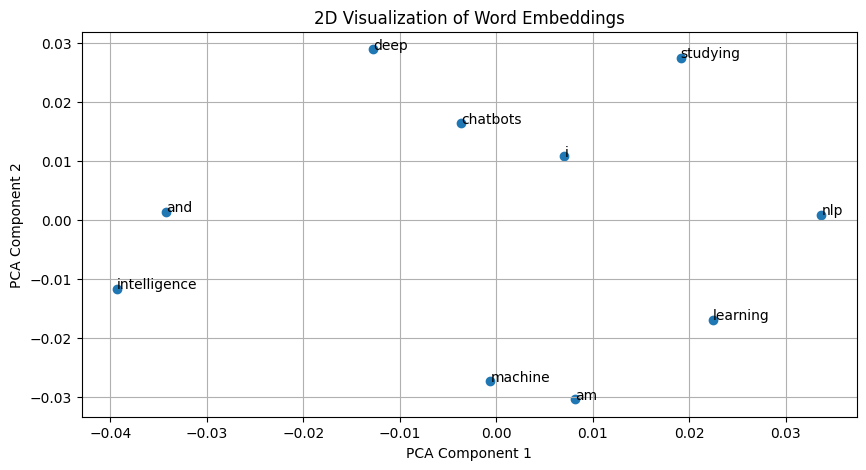

In [56]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.scatter(pca_result[:, 0], pca_result[:, 1])


for i, word in enumerate(words):
    plt.annotate(word, (pca_result[i, 0], pca_result[i, 1]))

plt.title("2D Visualization of Word Embeddings")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()
